### Assignment 5-6
#### Olga Iarygina

#### ex1 :: Bayesian Statistics

The first part of the assignment is devoted to Bayesian Statistics. 

Let's consider the following linear model:
$$y = ax + b + \epsilon ,$$ where $\epsilon$ is a Gaussian noise term, and $\epsilon ∼ N (0, \sigma^2)$.

a) The probability density function of $\epsilon$ in this case is:
$$PDF = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x^2)}{2\sigma^2}}$$

b) Now we can derive the conditional probability distribution of $y$, knowing $a$, $x$ and $b$:

$$P(y|x; a; b) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - b - ax)^2}{2\sigma^2}}$$

c) The parameters of linear model $y = ax + b + \epsilon$ are:
- $\epsilon$ -  the Gaussian noise term
- $a$ - the coefficient of independent variable $x$
- $b$ - intercept

d) In a Bayesian treatment of the linear model, we need to assign priors for all of the unknown parameters, which in our case are: $\epsilon$, $a$ and $b$. We already use Gaussian for $\epsilon$, and this is white noise. 

As I guess, in the case of linear regression we can use Gaussian priors for all parameters. Because following the frequentist statistics, in linear regression, we have an assumption that all parameters follow the normal distribution. While actually normal distribution often cannot represent the nature of the data.

#### ex2 :: Linear Regression

In this exercise I implement the Linear Regression model and estimate how well can it predict the quality of the wine based on its physicochemical properties. The linear model I will learn is:
$$t = f(\mathbf{x, w}) = w_0 + w_1x_1 + w_2x_2 + ... + w_Dx_D = \mathbf{w}^T\mathbf{x}$$

$t$ - is the quality score of wine, $\mathbf{x}$ - are physicochemical properties, and $\mathbf{w}$ - are free parameters.

a) First, I implement a linear regression based on the given formula. The input of the function is the matrix X, which contains the input variables, and the output vector $t$. The function returns an estimate of free parameters $\mathbf{w}$.

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

%matplotlib inline

# a bit larger figures
plt.rcParams['figure.figsize'] = [9, 7.5]
plt.rcParams['figure.dpi'] = 100

In [2]:
redwine_train = np.loadtxt('redwine_training.txt')
redwine_test = np.loadtxt('redwine_testing.txt')

In [3]:
def multivarlinreg(X, y):

    ones = np.ones((len(y), 1))
    X = np.concatenate((ones, X), axis = 1) # add the vector of ones to the matrix
    
    dot_X = np.dot(np.transpose(X), X)
    dot_inv = np.dot(np.linalg.inv(dot_X), np.transpose(X))

    weights = np.dot(dot_inv, y)

    return weights

b) Then I run the function I made on the training set with only the 'fixed acidity' feature. I receive the following weights:

In [4]:
print(multivarlinreg(redwine_train[:, [0]], redwine_train[:, -1]))

[5.2057261  0.05035934]


What does it mean? The constant ~5.2 is the expected value of the dependent variable when all of the independent variables are set. Even though it often does not carry any crucial meaning, it is quite close to the mean quality of the wine in the dataset.

The weight of ~0.05 means that if we increase fixed acidity to one unit, on average the quality score of the wine will increase by ~0.05 points.

c) Then I run the regression on all the properties of the wine, getting the following results:

In [5]:
print(multivarlinreg(redwine_train[:, :-1], redwine_train[:, -1]))

[ 5.16573717e+01  1.95852727e-02 -1.06193618e+00  2.58896286e-02
  5.02281634e-02 -2.75489463e+00  5.65346092e-03 -3.80728880e-03
 -4.72092423e+01 -4.26639379e-01  8.50478130e-01  2.37895900e-01]


From this, we can roughly conclude, that the most positive effect on the quality score of the wine has the increase in the number of sulfates in the drink. And the most negative has the increase in density. However, we have not checked to which extend these parameters are significant, therefore, one should be careful with such conclusions.

Overall, the increases in fixed acidity, citric acid, residual sugar, free sulfur dioxide, sulfates and alcohol have a *positive* effect on the quality score of red wines. While the increase in volatile acidity, chlorides, total sulfur dioxide, density and pH have a *negative* effect on the quality score.

#### ex3 :: Evaluating Linear Regression

In this task, I evaluate the linear regression. 

a) For this I calculate the Root Means Square Error for linear model, according to the formula:

$$RMSE (\mathbf{w}) = \sqrt{\frac{1}{N} \sum_{i = 1}^{N}{||y_i - f(\mathbf{x_i, w})||}^2}$$

Here we have a set of input-output values $x, y$ we already know. $y_i$ is the output value corresponding to the $i^{th}$ point $x_i$ of the data. We use weights to compute $f(\mathbf{x_i, w})$, which is the output value predicted by my implementation of the linear regression.

In [6]:
def rmse(f, y):
    
    rmse = np.sqrt(np.mean((np.absolute(f - y)) ** 2))

    return rmse

b) Then I implement the linear regression as I did in Exercise 2b, but this time I use the first feature for the test set to calculate RMSE. For this, I extract independent variables right as I did in the linear regression model. The result I get is ~0.81. Since the lower values of RMSE correspond to better fit and keeping in mind that RMSE is in the same units as the response variable, I would say that result is quite satisfactory.

In [7]:
# add the vector of ones to the matrix
ones = np.ones((len(redwine_train[:, [0]]), 1))
feature = np.concatenate((ones, redwine_train[:, [0]]), axis = 1)

# getting regression coefficients
weight = multivarlinreg(redwine_train[:, [0]], redwine_train[:, -1])

# prediction
pred = np.dot(feature, weight)

# rmse
print(rmse(pred, redwine_train[:, -1]))

0.8102088052133464


c) Then I compute RMSE for the all-dimensional dataset, following the procedure above. 
The RMSE score decreased. Out of this, we can conclude that by adding more properties to this model we get a more accurate prediction.

In [8]:
full = np.concatenate((ones, redwine_train[:, :-1]), axis = 1)

weights = multivarlinreg(redwine_train[:, :-1], redwine_train[:, -1])

preds = np.dot(full, weights)

print(rmse(preds, redwine_train[:, -1]))

0.6515818785287674


#### ex4 :: Random Forest & Normalization

In this task, I apply the random forest classifier. 

Random Forest is a model, which is invariant under any strictly monotone transformation of the individual predictors. As I understand, in the case of Random Forest we do not need normalization, because the magnitudes of different features in this model are not compared across each other. The range here is used only to split one feature at each stage, so the relation to the ranges of other features is out of interest.

#### ex5 :: Applying Random Forest

Now I apply Random Forest to the IDSWeedCrop data. I train the model with 50 trees on the train set and then use the test set to evaluate the performance of the classifier.

The accuracy of the model is ~0.97.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

weeds_train = np.loadtxt('IDSWeedCropTrain.csv', delimiter = ',')
weeds_test = np.loadtxt('IDSWeedCropTest.csv', delimiter = ',')

# splitting train data
XTrain = weeds_train[:, :-1]
YTrain = weeds_train[:, -1]

rf = RandomForestClassifier(n_estimators = 50) # specifying the number of trees
rf.fit(XTrain, YTrain)

# splitting test data
XTest = weeds_test[:, :-1]
YTest = weeds_test[:, -1]

rf_pred = rf.predict(XTest)
rf_acc = accuracy_score(YTest, rf_pred)
print(rf_acc)

0.9668989547038328


Let's compare it with the kNN classifier. I use the sklearn implementation since it is much faster than my own one. But the results are the same. I played a bit with different k-s and CV and ended up with k = 3.

In [10]:
from sklearn.neighbors import KNeighborsClassifier

"""
class knn:

    def __init__(self, k = 5):  # I chose this default number as 1 neighbor was returned in sklearn by default
        self.k = k

    def euclidean_distance(self, a, b): # euclidean distance calculation
        dist = 0.0 
        
        for i in range(len(a)):
            dist += (a[i] - b[i]) ** 2
            euclidian_distance = np.sqrt(dist)
            
        return euclidian_distance


    def fit(self, XTrain, YTrain): # fitting the model
        self.XTrain = XTrain
        self.YTrain = YTrain

    def predict(self, XTest): # prediction based on getting the nearest neighbors
        pred = []

        for i in range(len(XTest)):  # here we iterate over the test set
            distances = []
            for point in self.XTrain:  # for each point in the train set we find a distance to each point in the test set
                point_dist = self.euclidean_distance(point, XTest[i])
                distances.append(point_dist)

            final = np.array(distances).argsort()[: self.k] # here I sort them and remain only specified number of k
            neighbors_list = {} # and then we count labels in YTrain
            
            for m in final:
                if self.YTrain[m] in neighbors_list:
                    neighbors_list[self.YTrain[m]] += 1
                else:
                    neighbors_list[self.YTrain[m]] = 1

            pred.append(max(neighbors_list, key = neighbors_list.get))
            
        return pred
"""
    
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(XTrain, YTrain)

acc_test = accuracy_score(YTest, knn.predict(XTest))
print(acc_test)

0.9494773519163763


The accuracy of kNN is ~0.95. Hence, in my case, the Random Forest model outperforms the nearest neighbour classifier.

#### ex6 :: Gradient Descent & Learning Rates

In this exercise I apply the gradient descent in order to find the minimum of the function $f(x) = e^{−x/2} + 10^2$.

First, I compute the derivative of the function $f$.

In [11]:
# function
def f(x):
    return (np.exp(-x / 2) + 10 * (x ** 2))

# derivative
def df(x):
    return (20 * x - 0.5 * np.exp(-x / 2))

Then I apply the gradient descent with learning rates $\eta = 0.1, 0.01, 0.001, 0.0001$.
I create a for loop that goes over learning rates, taking $x = 1$ at the start. I run the algorithm until the magnitude of the gradient is either below $10^{-10}$ or exceeds 10000 iterations. The function outputs the number of iterations it took the algorithm to converge, and the value of the function at the final iteration.

In [12]:
rates = [0.1, 0.01, 0.001, 0.0001]

# gradient descent
def gradient_descent():
    
    for i in rates:
        start = 1 # here we start the search
        
        for k in range(10000): # max number of iterations
            
            stream = start
            start = stream - i * df(stream)
            magnitude = start - stream
            
            if k == 9999:
                print('\nrate: ', i,
                     '\nreached 10000 of iterations')
            
            if abs(magnitude) < (10 ** -10): # the desired precision 
                print('\nrate: ', i,
                     '\nnumber of iterations: ', k + 1,
                     '\nfunction value at the final iteration: ', start)
                break

gradient_descent()


rate:  0.1 
reached 10000 of iterations

rate:  0.01 
number of iterations:  96 
function value at the final iteration:  0.02469323262707432

rate:  0.001 
number of iterations:  935 
function value at the final iteration:  0.024693237100521306

rate:  0.0001 
number of iterations:  8291 
function value at the final iteration:  0.024693281533279352


<ipython-input-11-fffe5b82ef68>:7: RuntimeWarning: overflow encountered in exp
  return (20 * x - 0.5 * np.exp(-x / 2))
<ipython-input-12-bfc811a62af7>:12: RuntimeWarning: invalid value encountered in double_scalars
  start = stream - i * df(stream)


Next, I find the tangent line and create a function to plot it with the gradient descent steps for the first three iterations. The initial point of the first tangent line is 1 since we start from it.

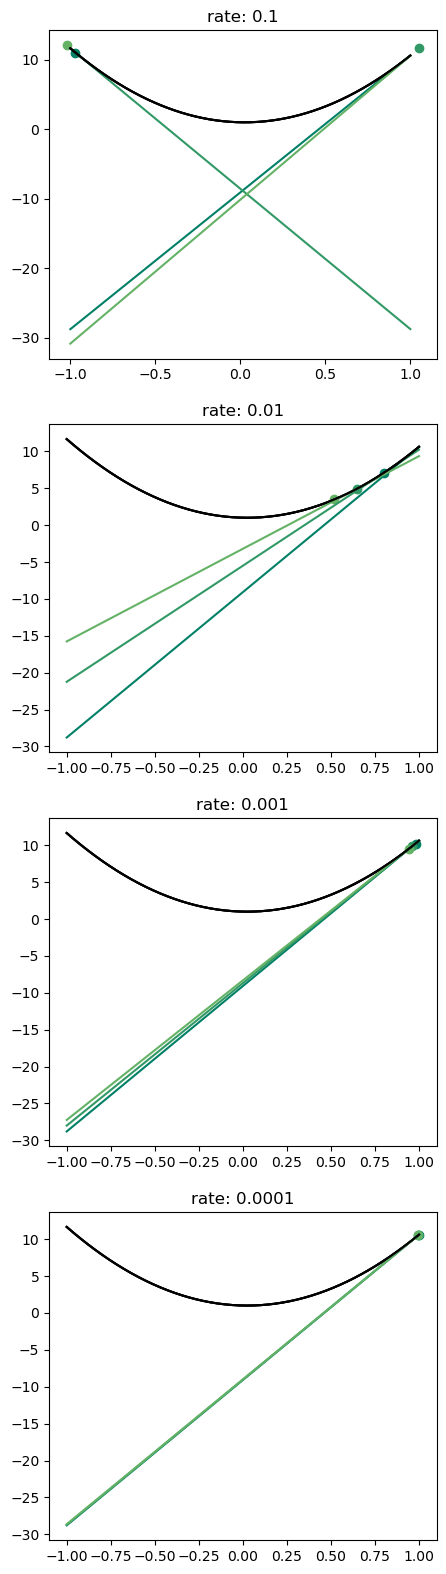

In [13]:
# tangent line
def tg(a, x): 
    return f(a) + df(a) * (x - a)

# tangent figure
def fig_tg():
    
    fig, ax = plt.subplots(4)
    fig.set_size_inches(5, 20) # adjust the size
    cmap = plt.get_cmap('summer') 
    
    for ind, i in enumerate(rates):
        x_axis = np.linspace(* (-1, 1))
        start = 1
        
        for k in range(3): # first three iterations
            tang = [tg(start, x) for x in x_axis]
            start -= df(start) * i
            
            ax[ind].scatter(start, f(start), color = cmap(k * 50))
            ax[ind].plot(x_axis, tang, color = cmap(k * 50))
            ax[ind].plot(x_axis, f(x_axis), color = 'black')
            
            ax[ind].set_title('rate: {}'.format(i))
            
fig_tg()           

Finally, I plot gradient descent steps for the first 10 iterations, without tangent lines. The function actually the same, just with a different number of steps and without tangents.

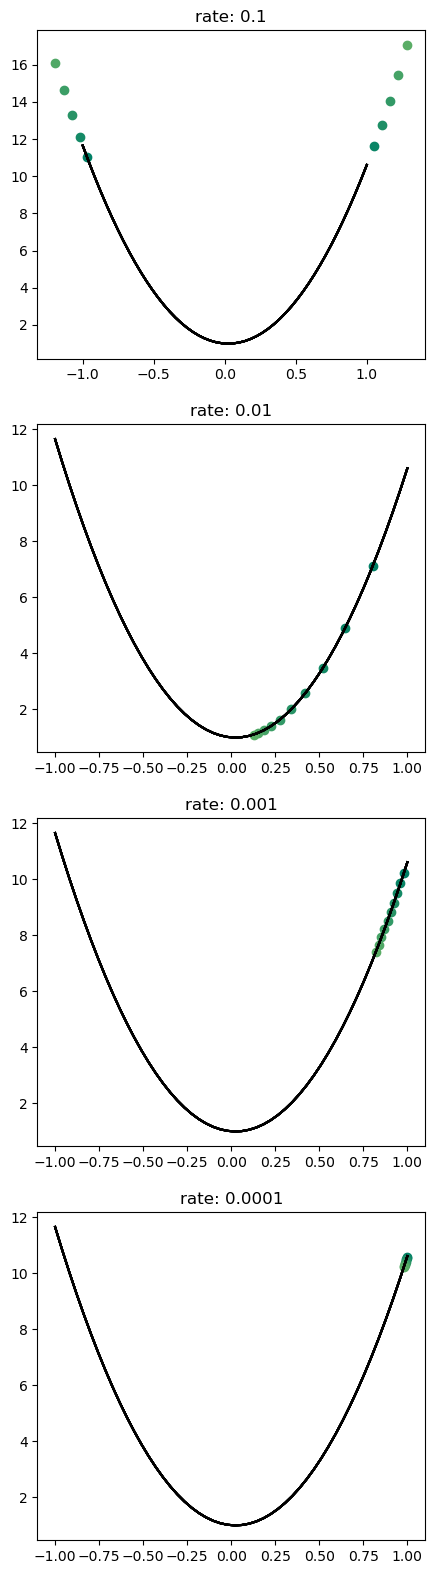

In [14]:
# steps figure
def fig_steps():
    
    fig, ax = plt.subplots(4)
    fig.set_size_inches(5, 20)
    
    cmap = plt.get_cmap('summer')
    
    for ind, i in enumerate(rates):
        x_axis = np.linspace(* (-1, 1))
        start = 1
        
        for k in range(10): # first ten iterations
            start -= df(start) * i
            
            ax[ind].plot(x_axis, f(x_axis), color = 'black')
            ax[ind].scatter(start, f(start),color = cmap(k * 10))
            ax[ind].set_title('rate: {}'.format(i))

fig_steps()

What can I say here, looking at all this stuff? 

If we take a look at the plots with tangents, we can see, that on the very first plot with the learning rate = 0.1, the rate is so high that it will never reach the minimum point. This is supported by the graph with steps. Step points rush between the left and right sides of the curve, and most likely it will never reach the minimum of the function and probably will converge to infinity. We can also make sure of this by looking at numbers that we get as a result of gradient descent. 

And then as the learning rate decreases, the tangent lines are flattening more slowly. We can also see, looking at learning rate numbers that they all converge to the same minimum point, but with different time. The smaller the learning rate, the more steps it takes to converge.

#### ex7 :: Logistic Regression

Oh, well. In this exercise me and my non-STEM background are trying to implement, run and test the Logistic Regression. I will use two datasets here, both consisting of 2 classes.

First, I just make scatterplots of the datasets, assigning different colours to different classes.

In [15]:
iris1_train = np.loadtxt('Iris2D1_train.txt')
iris2_train = np.loadtxt('Iris2D2_train.txt')

iris1_test = np.loadtxt('Iris2D1_test.txt')
iris2_test = np.loadtxt('Iris2D2_test.txt')

I combine test and train data to visualise full datasets.

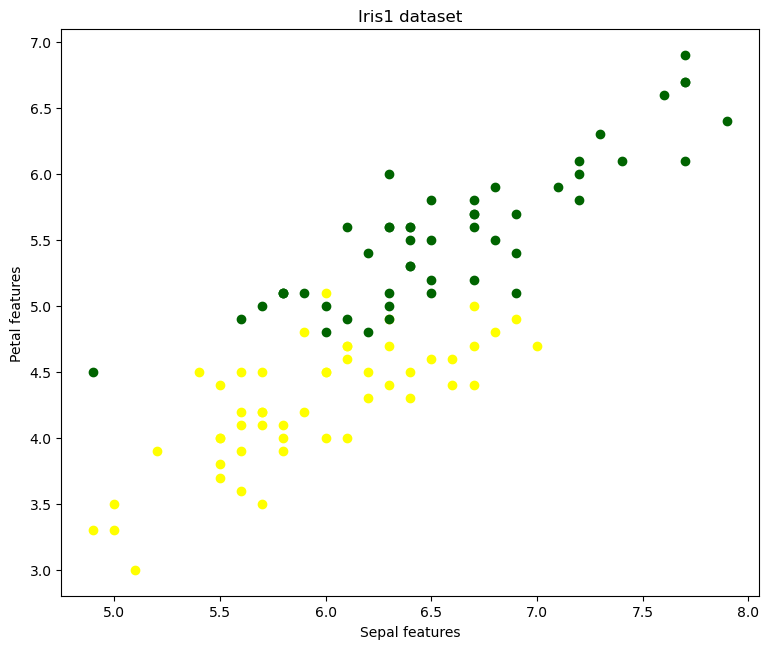

In [16]:
iris1 = np.concatenate((iris1_train, iris1_test), axis = 0)
iris1_class = iris1[:, -1]


for i in range(len(iris1)): 
    if iris1_class[i] == 1: 
        plt.scatter(iris1[i, 0], iris1[i, 1], color = 'darkgreen')
        
    elif iris1_class[i] == 0.: 
        plt.scatter(iris1[i, 0], iris1[i, 1], color = 'yellow')
        
plt.title('Iris1 dataset')
plt.xlabel('Sepal features')
plt.ylabel('Petal features')
plt.show()

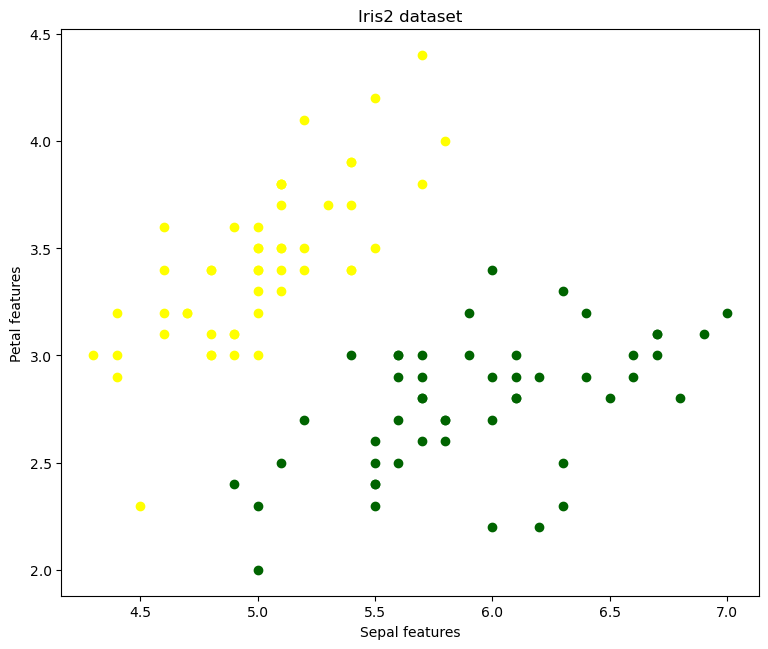

In [17]:
iris2 = np.concatenate((iris2_train, iris2_test), axis = 0)
iris2_class = iris2[:, -1]


for i in range(len(iris2)): 
    if iris2_class[i] == 1: 
        plt.scatter(iris2[i, 0], iris2[i, 1], color = 'darkgreen')
        
    elif iris2_class[i] == 0.: 
        plt.scatter(iris2[i, 0], iris2[i, 1], color = 'yellow')
        
plt.title('Iris2 dataset')
plt.xlabel('Sepal features')
plt.ylabel('Petal features')
plt.show()

Looking at these two plots, we can see that 2 classes are more or less clearly divided. Especially in the second dataset, we can easily imagine a line that separates 2 classes. But we can see a little overlap in the case with the first dataset.

Then I implement Logistic Regression following the procedure described in the lecture and some StackOverflow tips. The input values of the model are the training matrix, training labels and test matrix.

First, I create the sigmoid function.

In [38]:
def sigmoid(x):
    xp = (x >  0) * 1.0
    xm = (x <= 0) * 1.0
    return xm * (np.exp(x * xm)) / (1 + np.exp(x * xm)) + xp * (1 / (1 + np.exp(-xp * x)))

Then I apply log in-sample error function as it was presented in the lecture.

In [39]:
def logistic_insample(X, y, w):
    
    N, num_feat = X.shape    
    E = 0
    
    for n in range(N):
        E = E + np.log(1 + np.exp(-y[n] * (X[n].dot(w))))
        
    E = E / N
    return E

And the gradient descent for logistic regression. Here we need the sigmoid function I calculated above.

In [40]:
def logistic_gradient(X, y, w):
    N, _ = X.shape
    g = 0 * w
    
    for n in range(N):
        g = g + y[n] * X[n] * sigmoid(-y[n] * np.dot(X[n], w))
        
    g = -g / N
    return g

And then, we move to logistic regression.

In [41]:
def log_reg(Xorig, y, max_iter, grad_thr):   
    
    # X is a d by N data matrix of input values
    num_pts, num_feat = Xorig.shape
    onevec = np.ones((num_pts, 1))
    X = np.concatenate((onevec, Xorig), axis = 1)
    dplus1 = num_feat + 1
    
    # y is a N by 1 matrix of target values -1 and 1
    y = np.array((y - .5) * 2)
        
    # Initialize learning rate for gradient descent
    learningrate = 0.1        
    
    # Initialize weights at time step 0    
    w = 0.1 * np.random.randn(num_feat + 1)
    
    # Compute value of logistic log likelihood
    value = logistic_insample(X, y, w)
    
    num_iter = 0  
    convergence = 0
    
    # Keep track of function values
    E_in = []
    
    while convergence == 0:
        num_iter = num_iter + 1                        

        # Compute gradient at current w      
        g = logistic_gradient(X, y, w)
       
        # Set direction to move and take a step       
        
        w_new = w - learningrate * g
       
        # Check for improvement
        # Compute in-sample error for new w
        cur_value = logistic_insample(X, y, w_new)
        if cur_value < value:
            w = w_new
            value = cur_value
            E_in.append(value)
            learningrate *= 1.1
        else:
            learningrate *= 0.9   
            
        # Determine whether we have converged: Is gradient norm below
        # threshold, and have we reached max_iter?
               
        g_norm = np.linalg.norm(g)
        if g_norm < grad_thr:
            convergence = 1
        elif num_iter > max_iter:
            convergence = 1
           
    return w, E_in 

And finally, we make the predictions, where we actually take the training matrix, training labels and test matrix as an input. As the output I predict just labels to be able to fit the accuracy_score function and get the error rate.

In [42]:
def log_pred(Xorig, y, Xtest):
    
    max_iter = 10000 
    grad_thr = 0.0000001
    
    w, E = log_reg(Xorig, y, max_iter, grad_thr) # applying the weights
    
    N, d = Xtest.shape # rows, cols
    N1 = np.reshape(np.ones(N), (N, 1))
    X = np.hstack((N1, Xtest))
    
    # get the prediction
    prob = sigmoid(np.dot(X, w)) 
    pred = (prob > 0.5)
    
    return pred

Then I apply this implementation to the datasets. The error rate for the second dataset is much lower, probably, since the separation on the plots is much more obvious and does not have any overlaps. *I feel like I messed up something, but I do not get where :(*

In [44]:
iris1_pred_train = log_pred(iris1_train[:, 0:2], iris1_train[:, 2], iris1_train[:, 0:2])
iris1_acc_train = accuracy_score(iris1_train[:, 2], iris1_pred_train)

iris1_pred_test = log_pred(iris1_train[:, 0:2], iris1_train[:, 2], iris1_test[:, 0:2])
iris1_acc_test = accuracy_score(iris1_test[:, 2], iris1_pred_test)

iris2_pred_train = log_pred(iris2_train[:, 0:2], iris2_train[:, 2], iris2_train[:, 0:2])
iris2_acc_train = accuracy_score(iris2_train[:, 2], iris2_pred_train)

iris2_pred_test = log_pred(iris2_train[:, 0:2], iris2_train[:, 2], iris2_test[:, 0:2])
iris2_acc_test = accuracy_score(iris2_test[:, 2], iris2_pred_test)

print("Iris1 train error", 1 - iris1_acc_train,
      "\nIris1 test error", 1 - iris1_acc_test,
     "\nIris2 train error", 1 - iris2_acc_train,
      "\nIris2 test error", 1 - iris2_acc_test)

Iris1 train error 0.05714285714285716 
Iris1 test error 0.06666666666666665 
Iris2 train error 0.0 
Iris2 test error 0.0


And here are the parameters of the linear model.

In [45]:
iris1_w, E1 = log_reg(iris1_train[:, 0:2], iris1_train[:, 2], 10000, 0.0000001)
iris2_w, E2 = log_reg(iris2_train[:, 0:2], iris2_train[:, 2], 10000, 0.0000001)

print("Parameters of linear model for Iris1:", iris1_w,
     "\nParameters of linear model for Iris2:", iris2_w)

Parameters of linear model for Iris1: [-12.72162274  -4.60750517   8.41092143] 
Parameters of linear model for Iris2: [-28.95705667  12.6548681  -12.69645426]


#### ex8 :: Logistic Regression Loss-Gradient

a) We know from the lecture, that the in-sample error function is the following:

$$\frac{1}{N}\sum_{n = 1}^{N}\ln(1 + e^{-y_n\mathbf{w}^T\mathbf{x}_n})$$

The logistic gradient is the derivative of the in-sample function. In the in-sample formula, we have a summation over a complex function. So, computing the gradient, according to the rules, we have to take the derivative not only of the $\ln$ but also of the expression within this natural logarithm. Hence, let's take the derivative. First, we get rid of the constant 1. The exponential function has the special property that its derivative is the function itself, so here we get $-y_n\mathbf{x}_n$. Further, we substitute the sigmoid function and simplify the expression with the exponent function, which is $e^{-y_n\mathbf{w^Tx_n}}$.  
All of these results actually to the following expression:

$$\nabla E_{in}(\mathbf{w}) = -\frac{1}{N}\sum_{n = 1}^{N}\frac{y_n\mathbf{x}_n}{1+e^{-y_n\mathbf{w}^T\mathbf{x}_n}} = \frac{1}{N}\sum_{n = 1}^{N}-y_n\mathbf{x}_n\theta(-y_n\mathbf{w}^T\mathbf{x}_n)$$

b) Let's have a look at the sigmoid function we have inside the formula of the gradient. It looks in the following way: $\theta(-y_n\mathbf{w}^T\mathbf{x}_n)$. What happens with this expression if we have misclassification? Parameters $y_n$ and $\mathbf{w}^T\mathbf{x}_n$ will have an different signs. Knowing that minus multiplied on minus gives plus, the expression inside the sigmoid function will be positive. Therefore, the sigmoid function has an increase with positive values, which we would not observe in the case with a correct classification. Thus, a misclassified example contributes to the gradient more.

We can see it on the plot, given in the lecture handout.

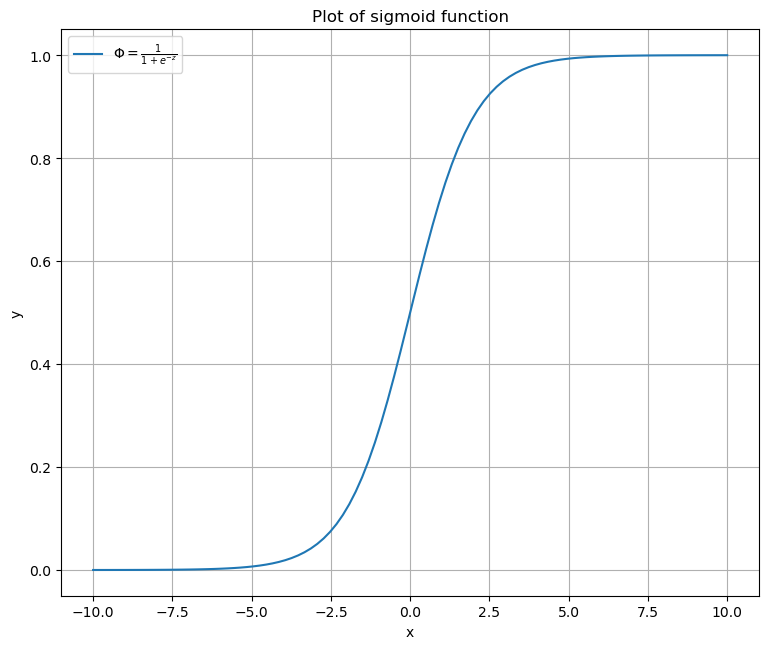

In [46]:
x = np.linspace(-10, 10, num = 100)

plt.plot(x, sigmoid(x), label =r'$\Phi = \frac{1}{1+e^{-z}}$')
plt.legend()

plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of sigmoid function')
plt.show()

#### ex9 :: Clustering and Classification

This part is devoted to clustering and classification of handwritten digits.

a) First of all, I run the kmeans algorithm with k = 3 on the MNIST dataset. This time I decided to use sklearn implementation of KMeans, as it is really a lot in assignment already.

I apply kMeans and then separate the data according to the clusters it belongs to.

In [47]:
mnist_digits = np.loadtxt('MNIST_179_digits.txt')
mnist_labels = np.loadtxt('MNIST_179_labels.txt')

from sklearn.cluster import KMeans 

"""
def kmeans(data, n_clusters, max_iter = 100):
    
    centroids = startingPoint # initialize centroids
    
    for i in range(max_iter):
        
        cluster = np.array([np.argmin([np.dot(x - y, x - y) for y in centroids]) for x in data])  # assign the clusters

        centroids = [data[cluster == l].mean(axis = 0) for l in range(n_clusters)] # compute the new centroid
        
    return np.array(centroids) # return cluster centroids
    """

kmeans = KMeans(n_clusters = 3).fit(mnist_digits)

cluster1 = mnist_labels[kmeans.labels_ == 0]
cluster2 = mnist_labels[kmeans.labels_ == 1]
cluster3 = mnist_labels[kmeans.labels_ == 2]

We have 3 clusters, and kMeans return just the labels and not the actual handwritten digits, which is not really meaningful in terms of interpretation. To be able to understand whether the classification is good, and what does each cluster represent, I calculate the proportion of '1', '7' and '9' in each of the clusters. 

Out of this, we can conclude that this cluster is representing 9s, since most of the 9 points belong to it. We can check it by plotting the centres of the first cluster. And yeah, 9 is pretty distinguishable here.

Proportion of 1s in the first cluster:  0.0028169014084507044 
Proportion of 7s in the first cluster:  0.6197183098591549 
Proportion of 9s in the first cluster:  0.37746478873239436


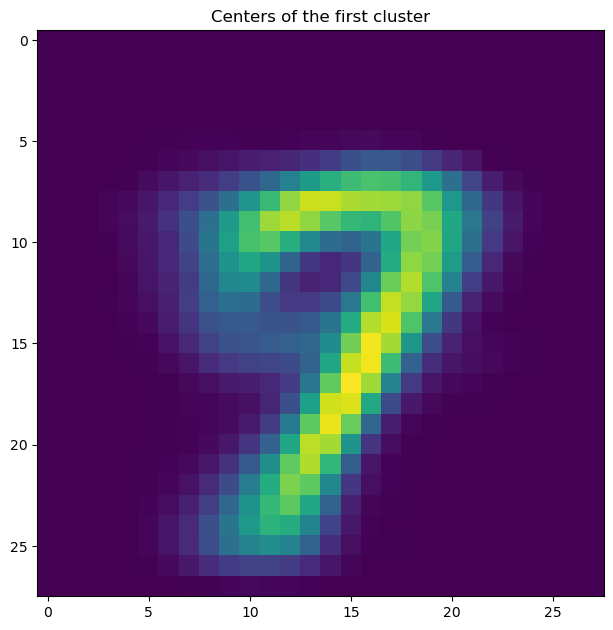

In [48]:
cluster1_1 = (cluster1 == 1)
cluster1_1 = sum(cluster1_1) / len(cluster1)

cluster1_7 = (cluster1 == 7)
cluster1_7 = sum(cluster1_7) / len(cluster1)

cluster1_9 = (cluster1 == 9)
cluster1_9 = sum(cluster1_9) / len(cluster1)

print("Proportion of 1s in the first cluster: ", cluster1_1,
     "\nProportion of 7s in the first cluster: ", cluster1_7,
     "\nProportion of 9s in the first cluster: ", cluster1_9)

x = kmeans.cluster_centers_[0]

plt.imshow(np.reshape(x, (28, 28)))
plt.title('Centers of the first cluster')
plt.show()

And now I just repeat the procedure for the other two clusters.

Considering the second one, we can see that the highest proportion is for digit 1. Which is confirmed by plotting, but not very clear. But we still can understand that this is 1 since it is really hard to mix it with any other digit.

Proportion of 1s in the second cluster:  0.8983050847457628 
Proportion of 7s in the second cluster:  0.0774818401937046 
Proportion of 9s in the second cluster:  0.024213075060532687


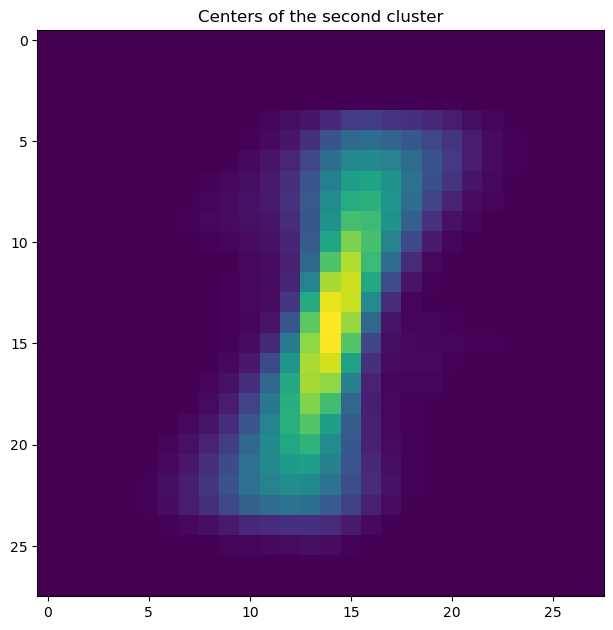

In [49]:
cluster2_1 = (cluster2 == 1)
cluster2_1 = sum(cluster2_1) / len(cluster2)

cluster2_7 = (cluster2 == 7)
cluster2_7 = sum(cluster2_7) / len(cluster2)

cluster2_9 = (cluster2 == 9)
cluster2_9 = sum(cluster2_9) / len(cluster2)

print("Proportion of 1s in the second cluster: ", cluster2_1,
     "\nProportion of 7s in the second cluster: ", cluster2_7,
     "\nProportion of 9s in the second cluster: ", cluster2_9)

x = kmeans.cluster_centers_[1]

plt.imshow(np.reshape(x, (28, 28)))
plt.title('Centers of the second cluster')
plt.show()

And I make exactly all the same for the last cluster. As expected, the highest proportion is for 7 this time. This case is different than with 1, and actually, 9 and 7 can be mixed. Actually, I would mess up it with 9 if I did not know the proportion.

Proportion of 1s in the third cluster:  0.008403361344537815 
Proportion of 7s in the third cluster:  0.3445378151260504 
Proportion of 9s in the third cluster:  0.6470588235294118


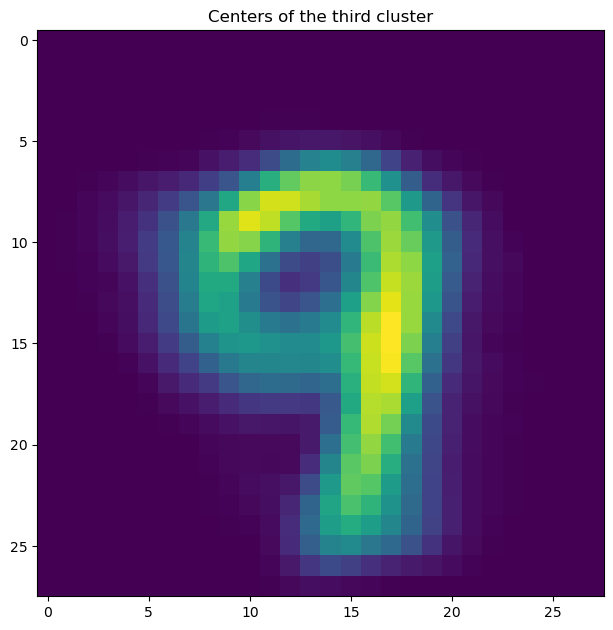

In [50]:
cluster3_1 = (cluster3 == 1)
cluster3_1 = sum(cluster3_1) / len(cluster3)

cluster3_7 = (cluster3 == 7)
cluster3_7 = sum(cluster3_7) / len(cluster3)

cluster3_9 = (cluster3 == 9)
cluster3_9 = sum(cluster3_9) / len(cluster3)

print("Proportion of 1s in the third cluster: ", cluster3_1,
     "\nProportion of 7s in the third cluster: ", cluster3_7,
     "\nProportion of 9s in the third cluster: ", cluster3_9)

x = kmeans.cluster_centers_[2]

plt.imshow(np.reshape(x, (28, 28)))
plt.title('Centers of the third cluster')
plt.show()

b) Then I apply the k-NN classifier. I also use sklearn implementation this time since it is much faster than my own implementation. Actually, my own implementation yields exactly the same results, so I think it is fine. 

In order to obtain the optimal k, I use cross-validation with 5 folds and iterate over different divisions and different numbers of k to find the best variant. I reuse the code from one of my previous Assignments.

In [51]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split

XTrain, XTest, YTrain, YTest = train_test_split(mnist_digits, mnist_labels, test_size = 0.5)
cv = KFold(n_splits = 5)

num_neighbors = [1, 2, 3, 5, 7, 9, 11] # identify differet values of k parameter to put them into for loop
num_accuracy = [] # here I will store the accuracies

for i in num_neighbors:
    accTest = []
    
    for train, test in cv.split(XTrain):
        XTrainCV, XTestCV, YTrainCV, YTestCV = XTrain[train], XTrain[test], YTrain[train], YTrain[test] # CV splitting
        
        knn = KNeighborsClassifier(n_neighbors = i) #fit the model
        knn.fit(XTrainCV, YTrainCV)
        accuracy = accuracy_score(YTestCV, knn.predict(XTestCV)) # get accuracy
        accTest.append(accuracy)
        
    num_accTest = np.mean(accTest) # find the mean between folds
    num_accuracy.append(num_accTest) # store the results
    
    print("Given k =", i, "the mean accuracy =", np.mean(accTest))

Given k = 1 the mean accuracy = 0.9644121365360304
Given k = 2 the mean accuracy = 0.9359513274336283
Given k = 3 the mean accuracy = 0.9538084702907712
Given k = 5 the mean accuracy = 0.9484513274336284
Given k = 7 the mean accuracy = 0.950189633375474
Given k = 9 the mean accuracy = 0.9430783817951959
Given k = 11 the mean accuracy = 0.9395069532237674


The best accuracy I receive is when k = 1.

#### ex10 :: Clustering and Classification after Dimensionality Reduction

In the very final task, I apply PCA to the dataset and perform clustering and classification only after reducing the dimensionality.

a) So, I start with computing PCA of the training data. I use sklearn implementation here. And then I plot the cumulative variance.

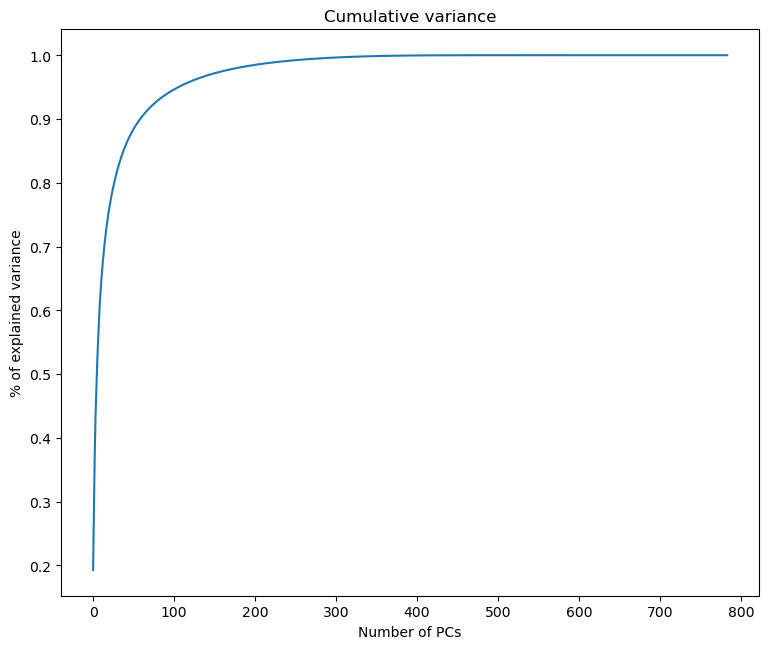

In [52]:
from sklearn.decomposition import PCA 

"""
def pca(data):
    
    cov = np.cov(data, rowvar = False) # covariance matrix
    eig_val, eig_vec = np.linalg.eigh(cov) # eigenvectors and eigenvalues
    
    sort = np.argsort(eig_val)[::-1] # sorting
    sort_eig_val = eig_val[sort]
    sort_eig_vec = eig_vec[:, sort]
    
    return sort_eig_val, sort_eig_vec
    """

pca = PCA()
pca.fit(mnist_digits)
evals = pca.explained_variance_ 

plt.plot(np.cumsum(evals) / np.sum(evals))

plt.xlabel("Number of PCs")
plt.ylabel("% of explained variance")
plt.title("Cumulative variance")
plt.show()

Here I can see that at about 200 principal components the line is flattening out. It means, that after this principle components do not explain variance anymore.

b) Next I repeat the procedure with kMeans, but to cluster the data projected onto the first PC.
I play with 20 and 200 components here. As in the previous exercise, I calculate the proportion of different digits in each of the clusters.

Let's start with 20 components. After fitting the PCA and projection of the data, I repeat all the procedure I did above.

In [53]:
pca = PCA(n_components = 20) 
pca.fit(mnist_digits)
pc20 = pca.components_ 
proj_digits = mnist_digits.dot(pc20.T) # projection

kmeans = KMeans(n_clusters = 3).fit(proj_digits)
kmeans.labels_

cluster1 = mnist_labels[kmeans.labels_ == 0]
cluster2 = mnist_labels[kmeans.labels_ == 1]
cluster3 = mnist_labels[kmeans.labels_ == 2]

Proportion of 1s in the first cluster:  0.8961352657004831 
Proportion of 7s in the first cluster:  0.07971014492753623 
Proportion of 9s in the first cluster:  0.024154589371980676


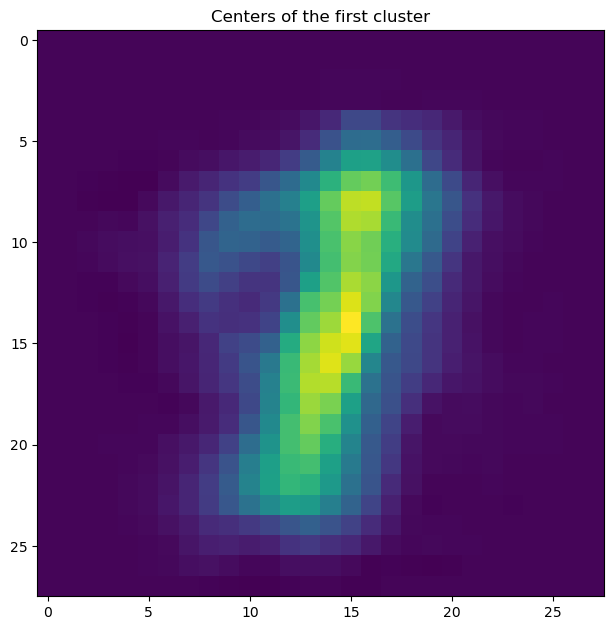

In [54]:
cluster1_1 = (cluster1 == 1)
cluster1_1 = sum(cluster1_1) / len(cluster1)

cluster1_7 = (cluster1 == 7)
cluster1_7 = sum(cluster1_7) / len(cluster1)

cluster1_9 = (cluster1 == 9)
cluster1_9 = sum(cluster1_9) / len(cluster1)

print("Proportion of 1s in the first cluster: ", cluster1_1,
     "\nProportion of 7s in the first cluster: ", cluster1_7,
     "\nProportion of 9s in the first cluster: ", cluster1_9)

kmeans_cent = kmeans.cluster_centers_
pca_cent = pca.inverse_transform(kmeans_cent) # getting original dimension

plt.imshow(np.reshape(pca_cent[0], (28, 28)))
plt.title('Centers of the first cluster')
plt.show()

As the numbers say this time, this cluster mostly captures 7. To plot it I have to transform the centre back to the initial dimension. Well, kind of similar with 9 again, but the top is quite thick, so it really looks like 7.

Then we go for the second cluster.

Proportion of 1s in the second cluster:  0.0027247956403269754 
Proportion of 7s in the second cluster:  0.6212534059945504 
Proportion of 9s in the second cluster:  0.3760217983651226


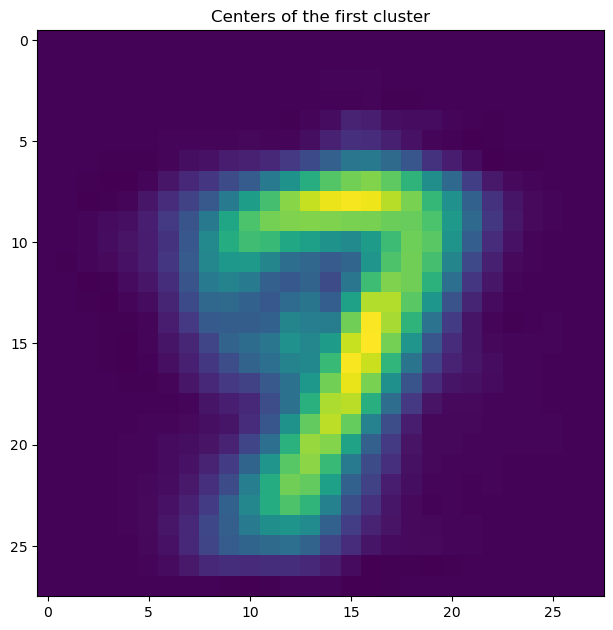

In [55]:
cluster2_1 = (cluster2 == 1)
cluster2_1 = sum(cluster2_1) / len(cluster2)

cluster2_7 = (cluster2 == 7)
cluster2_7 = sum(cluster2_7) / len(cluster2)

cluster2_9 = (cluster2 == 9)
cluster2_9 = sum(cluster2_9) / len(cluster2)

print("Proportion of 1s in the second cluster: ", cluster2_1,
     "\nProportion of 7s in the second cluster: ", cluster2_7,
     "\nProportion of 9s in the second cluster: ", cluster2_9)

plt.imshow(np.reshape(pca_cent[1], (28, 28)))
plt.title('Centers of the first cluster')
plt.show()

Yes! It is thicker for all of the numbers, so we can conclude that it is nine. And finally, the third class, which is 1.

Proportion of 1s in the third cluster:  0.00872093023255814 
Proportion of 7s in the third cluster:  0.3313953488372093 
Proportion of 9s in the third cluster:  0.6598837209302325


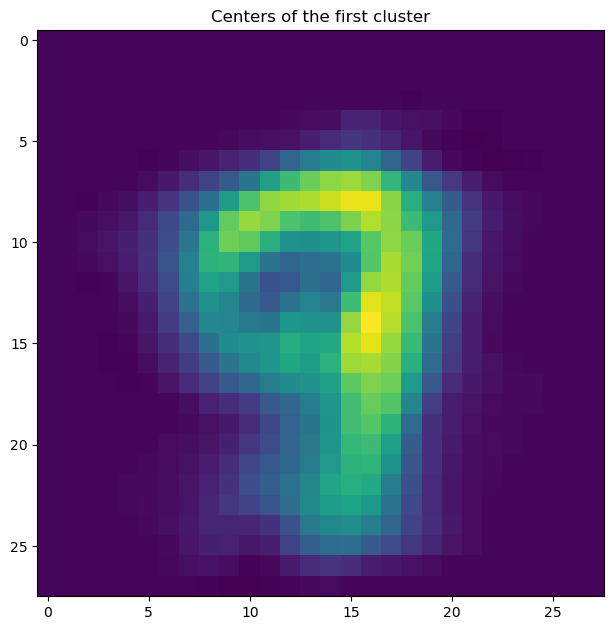

In [56]:
cluster3_1 = (cluster3 == 1)
cluster3_1 = sum(cluster3_1) / len(cluster3)

cluster3_7 = (cluster3 == 7)
cluster3_7 = sum(cluster3_7) / len(cluster3)

cluster3_9 = (cluster3 == 9)
cluster3_9 = sum(cluster3_9) / len(cluster3)

print("Proportion of 1s in the third cluster: ", cluster3_1,
     "\nProportion of 7s in the third cluster: ", cluster3_7,
     "\nProportion of 9s in the third cluster: ", cluster3_9)

plt.imshow(np.reshape(pca_cent[2], (28, 28)))
plt.title('Centers of the first cluster')
plt.show()

Now I proceed with 200 components. 

In [57]:
pca = PCA(n_components = 200) 
pca.fit(mnist_digits)
pc20 = pca.components_ 
proj_digits = mnist_digits.dot(pc20.T) # projection

kmeans = KMeans(n_clusters = 3).fit(proj_digits)
kmeans.labels_

cluster1 = mnist_labels[kmeans.labels_ == 0]
cluster2 = mnist_labels[kmeans.labels_ == 1]
cluster3 = mnist_labels[kmeans.labels_ == 2]

Proportion of 1s in the first cluster:  0.008695652173913044 
Proportion of 7s in the first cluster:  0.33043478260869563 
Proportion of 9s in the first cluster:  0.6608695652173913


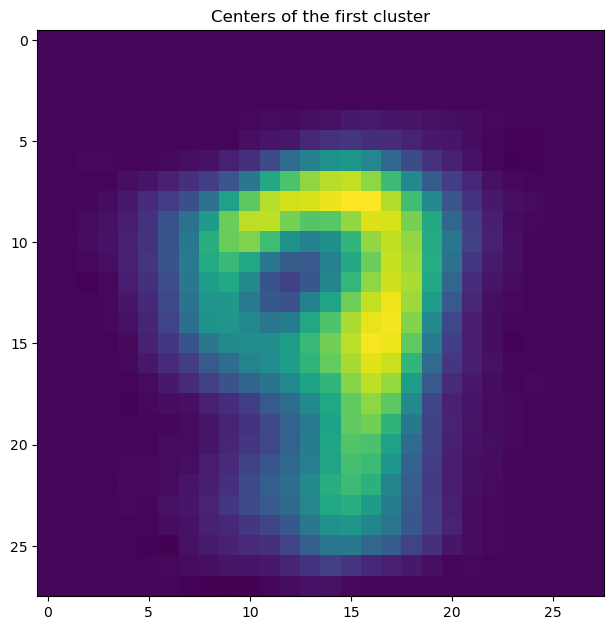

In [58]:
cluster1_1 = (cluster1 == 1)
cluster1_1 = sum(cluster1_1) / len(cluster1)

cluster1_7 = (cluster1 == 7)
cluster1_7 = sum(cluster1_7) / len(cluster1)

cluster1_9 = (cluster1 == 9)
cluster1_9 = sum(cluster1_9) / len(cluster1)

print("Proportion of 1s in the first cluster: ", cluster1_1,
     "\nProportion of 7s in the first cluster: ", cluster1_7,
     "\nProportion of 9s in the first cluster: ", cluster1_9)

kmeans_cent = kmeans.cluster_centers_
pca_cent = pca.inverse_transform(kmeans_cent) # getting original dimension

plt.imshow(np.reshape(pca_cent[0], (28, 28)))
plt.title('Centers of the first cluster')
plt.show()

This time, the highest proportion of the first class is for 9, and it is distinguishable on the plot.

Proportion of 1s in the second cluster:  0.9004854368932039 
Proportion of 7s in the second cluster:  0.07524271844660194 
Proportion of 9s in the second cluster:  0.024271844660194174


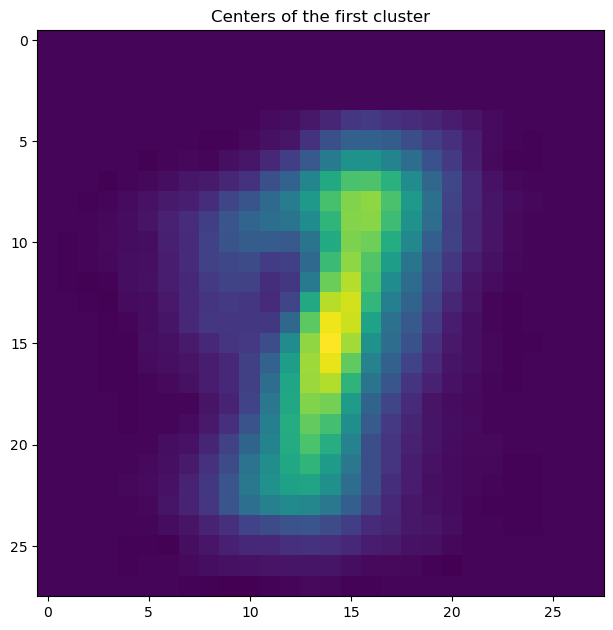

In [59]:
cluster2_1 = (cluster2 == 1)
cluster2_1 = sum(cluster2_1) / len(cluster2)

cluster2_7 = (cluster2 == 7)
cluster2_7 = sum(cluster2_7) / len(cluster2)

cluster2_9 = (cluster2 == 9)
cluster2_9 = sum(cluster2_9) / len(cluster2)

print("Proportion of 1s in the second cluster: ", cluster2_1,
     "\nProportion of 7s in the second cluster: ", cluster2_7,
     "\nProportion of 9s in the second cluster: ", cluster2_9)

plt.imshow(np.reshape(pca_cent[1], (28, 28)))
plt.title('Centers of the first cluster')
plt.show()

The second class mostly captures digit 1.

Proportion of 1s in the third cluster:  0.002717391304347826 
Proportion of 7s in the third cluster:  0.625 
Proportion of 9s in the third cluster:  0.37228260869565216


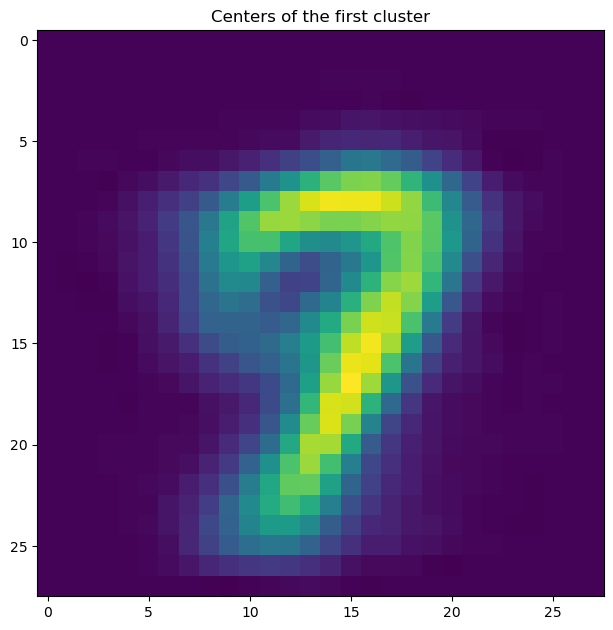

In [60]:
cluster3_1 = (cluster3 == 1)
cluster3_1 = sum(cluster3_1) / len(cluster3)

cluster3_7 = (cluster3 == 7)
cluster3_7 = sum(cluster3_7) / len(cluster3)

cluster3_9 = (cluster3 == 9)
cluster3_9 = sum(cluster3_9) / len(cluster3)

print("Proportion of 1s in the third cluster: ", cluster3_1,
     "\nProportion of 7s in the third cluster: ", cluster3_7,
     "\nProportion of 9s in the third cluster: ", cluster3_9)

plt.imshow(np.reshape(pca_cent[2], (28, 28)))
plt.title('Centers of the first cluster')
plt.show()

And the last one is mostly for 7, but still, about 1/3 of the class is occupied by 9, so the plot is a little bit confusing.

c) At the very end, I do kNN with projected data, again repeating the procedure from the previous exercise. First, with 20 components.

In [61]:
pca = PCA(n_components = 20) 
pca.fit(mnist_digits)
pcomp = pca.components_ 
proj_digits = mnist_digits.dot(pcomp.T)

XTrain, XTest, YTrain, YTest = train_test_split(proj_digits, mnist_labels, test_size = 0.5)
cv = KFold(n_splits = 5)

num_neighbors = [1, 2, 3, 5, 7, 9, 11] # identify differet values of k parameter to put them into for loop
num_accuracy = [] # here I will store the accuracies

for i in num_neighbors:
    accTest = []
    
    for train, test in cv.split(XTrain):
        XTrainCV, XTestCV, YTrainCV, YTestCV = XTrain[train], XTrain[test], YTrain[train], YTrain[test] # CV splitting
        
        knn = KNeighborsClassifier(n_neighbors = i) #fit the model
        knn.fit(XTrainCV, YTrainCV)
        accuracy = accuracy_score(YTestCV, knn.predict(XTestCV)) # get accuracy
        accTest.append(accuracy)
        
    num_accTest = np.mean(accTest) # find the mean between folds
    num_accuracy.append(num_accTest) # store the results
    
    print("Given k =", i, "the mean accuracy =", np.mean(accTest))

Given k = 1 the mean accuracy = 0.9768805309734512
Given k = 2 the mean accuracy = 0.9625948166877369
Given k = 3 the mean accuracy = 0.9661978508217446
Given k = 5 the mean accuracy = 0.9608723135271807
Given k = 7 the mean accuracy = 0.9662136536030342
Given k = 9 the mean accuracy = 0.9608881163084704
Given k = 11 the mean accuracy = 0.9644595448798988


For 20 components, I have the highest accuracy with k = 1.

In [62]:
pca = PCA(n_components = 200) 
pca.fit(mnist_digits)
pcomp = pca.components_ 
proj_digits = mnist_digits.dot(pcomp.T)

XTrain, XTest, YTrain, YTest = train_test_split(proj_digits, mnist_labels, test_size = 0.5)
cv = KFold(n_splits = 5)

num_neighbors = [1, 2, 3, 5, 7, 9, 11] # identify differet values of k parameter to put them into for loop
num_accuracy = [] # here I will store the accuracies

for i in num_neighbors:
    accTest = []
    
    for train, test in cv.split(XTrain):
        XTrainCV, XTestCV, YTrainCV, YTestCV = XTrain[train], XTrain[test], YTrain[train], YTrain[test] # CV splitting
        
        knn = KNeighborsClassifier(n_neighbors = i) #fit the model
        knn.fit(XTrainCV, YTrainCV)
        accuracy = accuracy_score(YTestCV, knn.predict(XTestCV)) # get accuracy
        accTest.append(accuracy)
        
    num_accTest = np.mean(accTest) # find the mean between folds
    num_accuracy.append(num_accTest) # store the results
    
    print("Given k =", i, "the mean accuracy =", np.mean(accTest))

Given k = 1 the mean accuracy = 0.9625948166877369
Given k = 2 the mean accuracy = 0.9465233881163083
Given k = 3 the mean accuracy = 0.9572376738305941
Given k = 5 the mean accuracy = 0.9554519595448798
Given k = 7 the mean accuracy = 0.9518963337547408
Given k = 9 the mean accuracy = 0.950126422250316
Given k = 11 the mean accuracy = 0.9518963337547408


As well as for 200.

The accuracy is slightly higher with 20 components. The difference is too small to make any conclusions, but still, I would suggest that we have more accurate predictions when there are fewer dimensions. Personally, I have not noticed any significant difference in the results with and without dimensionality reduction, because the ratio of the digits in different clusters is about the same. But maybe that is just because of the nature of the dataset.